#### 스플라인 보간법

1. 주어진 데이터를 부드러운 곡선으로 근사화하여 결측치를 채움
2. 다항식 또는 조각적 다항식 함수를 사용하여 데이터 곡선을 생성하고, 이를 통해 결측치 추정
3. 데이터셋이 크고 곡선의 특징을 정확하게 파악하는 경우 적합

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

#### 1. 데이터 생성

In [22]:
# 데이터 생성
np.random.seed(1)
dates = pd.date_range('2023-01-01', periods=1000, freq='d')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#### 2. 결측치 생성 및 확인

In [23]:
# 결측치 생성
data.loc[100:200,'Value'] = np.nan

# 결측치 생성 확인 체크
print(data.loc[100:200])

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


#### 3. 스플라인 보간법 적용
- 스플라인 보간법은 유효한 데이터에 대해서만 적용이 가능하다.
- 결측치를 제거하거나 대체하는 작업이 필요

In [24]:
# 결측치 채우기 
data['Value_filled'] = data['Value'].interpolate(method='linear')
print(data.loc[100:200])

          Date  Value  Value_filled
100 2023-04-11    NaN      0.699267
101 2023-04-12    NaN      0.700502
102 2023-04-13    NaN      0.701737
103 2023-04-14    NaN      0.702972
104 2023-04-15    NaN      0.704207
..         ...    ...           ...
196 2023-07-16    NaN      0.817830
197 2023-07-17    NaN      0.819065
198 2023-07-18    NaN      0.820301
199 2023-07-19    NaN      0.821536
200 2023-07-20    NaN      0.822771

[101 rows x 3 columns]


In [25]:
# 스플라인 보간법 적용
spl = CubicSpline(data.index, data['Value_filled'])
data['Value_spline'] = spl(data.index)
print(data.loc[100:200])

          Date  Value  Value_filled  Value_spline
100 2023-04-11    NaN      0.699267      0.699267
101 2023-04-12    NaN      0.700502      0.700502
102 2023-04-13    NaN      0.701737      0.701737
103 2023-04-14    NaN      0.702972      0.702972
104 2023-04-15    NaN      0.704207      0.704207
..         ...    ...           ...           ...
196 2023-07-16    NaN      0.817830      0.817830
197 2023-07-17    NaN      0.819065      0.819065
198 2023-07-18    NaN      0.820301      0.820301
199 2023-07-19    NaN      0.821536      0.821536
200 2023-07-20    NaN      0.822771      0.822771

[101 rows x 4 columns]


#### 4. 시각화

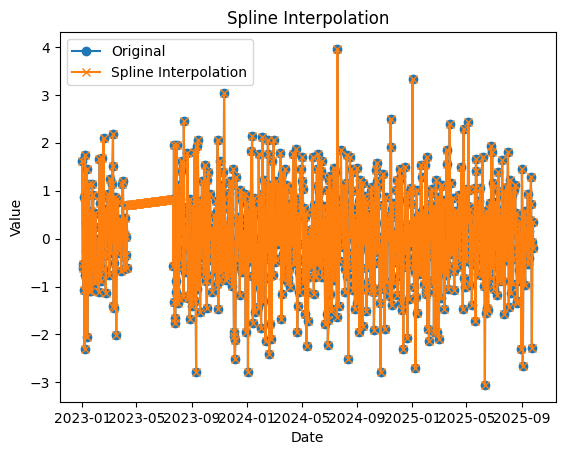

In [26]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spline Interpolation')
plt.legend()
plt.show()